<a href="https://colab.research.google.com/github/jasarel/Unupervised-Learning/blob/main/Copy_of_Identify_Customer_Segments_Finished.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Prerequsite - Upgrade Scikit Learn
The current workspace has scikit-learn v0.19.1 installed. However, you can upgrade scikit-learn to 0.24.x. and use this [OneHotEncoder](https://scikit-learn.org/0.21/modules/generated/sklearn.preprocessing.OneHotEncoder.html) library.


In [ ]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.7.1.


In [ ]:
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

In [ ]:
!python -m pip install --upgrade scikit-learn
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.7.1.


In [ ]:
# Now you can import and use OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# your code goes here

In [ ]:
# Similarly, should you need any other package, they can install it as:
!python -m pip install 'tensorflow-tensorboard<0.2.0,>=0.1.0'

# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [ ]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# magic word for producing visualizations in notebook
%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''
pd.options.display.max_rows = None
pd.options.display.max_columns = None

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [ ]:
# Load in the general demographics data.
general_pop = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep=';')

# Load in the feature summary file.
feature_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep=';')


/tmp/ipython-input-3205855864.py:2: DtypeWarning: Columns (57,59) have mixed types. Specify dtype option on import or set low_memory=False.
  general_pop = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep=';')


In [ ]:
# Check the structure of the data after it's loaded

# Print first 4 rows of G.P
general_pop.head(4)

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,KK_KUNDENTYP,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_BAUMAX,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,4,0,10.0,0,-1,15.0,4.0,2.0,2.0,1.0,1.0,0,0,5.0,2.0,6.0,7.0,5.0,1.0,5.0,3.0,3.0,4.0,7.0,6.0,6.0,5.0,3.0,-1.0,NaN,NaN,-1.0,3.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,1,1996,10.0,0,3,21.0,6.0,5.0,3.0,2.0,1.0,1,14,1.0,5.0,4.0,4.0,3.0,1.0,2.0,2.0,3.0,6.0,4.0,7.0,4.0,7.0,6.0,3.0,1.0,0.0,2.0,5.0,0.0,2.0,0.0,6.0,NaN,3.0,9.0,11.0,0.0,8.0,1.0,1992.0,W,4.0,8,8A,51,0.0,0.0,0.0,2.0,5.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,1,1979,10.0,1,3,3.0,1.0,1.0,1.0,3.0,2.0,1,15,3.0,4.0,1.0,3.0,3.0,4.0,4.0,6.0,3.0,4.0,7.0,7.0,7.0,3.0,3.0,2.0,0.0,0.0,1.0,5.0,17.0,1.0,0.0,4.0,NaN,3.0,9.0,10.0,0.0,1.0,5.0,1992.0,W,2.0,4,4C,24,1.0,3.0,1.0,0.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,6,1957,1.0,0,2,0.0,0.0,0.0,0.0,9.0,4.0,1,8,2.0,5.0,1.0,2.0,1.0,4.0,4.0,7.0,4.0,3.0,4.0,4.0,5.0,4.0,4.0,1.0,0.0,0.0,1.0,3.0,13.0,0.0,0.0,1.0,NaN,NaN,9.0,1.0,0.0,1.0,4.0,1997.0,W,7.0,2,2A,12,4.0,1.0,0.0,0.0,1.0,4.0,4.0,2.0,6.0,4.0,0.0,4.0,1.0,0.0,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0


In [ ]:
# Print number of rows/columns
general_pop.shape

(338826, 85)

In [ ]:
# Check for any missing values
general_pop.isnull().sum()

,0
AGER_TYP,0
ALTERSKATEGORIE_GROB,0
ANREDE_KZ,0
CJT_GESAMTTYP,1887
FINANZ_MINIMALIST,0
FINANZ_SPARER,0
FINANZ_VORSORGER,0
FINANZ_ANLEGER,0
FINANZ_UNAUFFAELLIGER,0
FINANZ_HAUSBAUER,0


In [ ]:
# Look at statistical information
general_pop.describe()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,KK_KUNDENTYP,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,WOHNLAGE,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_BAUMAX,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
count,338826.000000,338826.000000,338826.000000,336939.000000,338826.000000,338826.000000,338826.000000,338826.000000,338826.000000,338826.000000,338826.000000,338826.000000,336939.000000,338826.000000,338826.000000,336939.000000,336939.000000,336939.000000,336939.000000,336939.000000,336939.000000,338826.000000,338826.000000,336939.000000,338825.000000,338825.000000,338825.000000,338825.000000,338825.000000,338825.000000,338825.000000,338825.000000,338825.000000,338825.000000,338825.000000,338825.000000,338825.000000,338825.000000,338825.000000,311095.000000,311095.000000,338825.000000,338825.000000,311095.000000,311095.000000,311095.000000,331957.000000,116910.000000,298177.000000,311095.000000,303764.000000,302291.000000,303764.000000,310912.000000,303764.000000,303764.000000,288864.000000,288864.000000,288864.000000,288864.000000,288864.000000,288864.000000,303562.000000,303562.000000,303562.000000,303758.000000,293348.000000,288864.000000,336938.000000,293348.000000,299180.000000,295324.000000,295324.000000,295324.000000,295324.000000,295324.000000,295324.000000,295324.000000,302171.000000,302171.000000,302171.000000
mean,-0.360955,2.779008,1.522498,3.636768,3.080469,2.818453,3.414703,3.021793,2.883970,3.058694,3.774822,1100.195552,7.339144,0.199793,1.794349,14.669519,4.466349,3.609787,2.190486,4.810740,2.442807,1.027725,8.156237,3.421432,3.943824,4.268460,4.237680,3.996187,4.022118,4.360974,4.485726,4.022681,3.909830,4.766508,4.671143,4.446021,4.258936,3.662537,1.267398,0.008435,0.003430,1.199746,3.354077,10.880078,1.732336,0.004124,4.199568,3.403558,3.928482,7.915338,8.266457,0.040517,2.800608,3.013026,1993.236035,4.045545,1.507574,1.269836,0.616473,0.302776,1.381702,3.164856,4.151327,3.944884,4.553926,3.740428,2.590930,2.970391,2.700298,4.260602,622.935644,2.265048,2.807286,1.587189,0.692754,1.924943,3.618101,3.397106,3.147486,5.288585,3.070880
std,1.196828,1.070915,0.499494,1.593946,1.320624,1.462192,1.318258,1.528906,1.483695,1.351229,1.986636,976.722090,3.526843,0.399845,1.268004,12.631355,3.859948,3.930857,1.757905,3.433459,1.478493,0.585689,4.830075,1.421017,1.946346,1.917789,2.010605,1.856620,2.074474,2.020666,1.806275,1.904213,1.578496,1.829186,1.796695,1.855857,1.767204,1.704632,1.286581,0.091453,0.083468,0.951741,1.355486,7.641993,1.163125,0.068123,1.625882,1.626834,1.963804,1.919541,15.882785,0.317140,2.658980,1.546796,3.258973,1.947456,1.406661,1.243729,1.007784,0.635956,1.775086,1.326114,2.178602,1.710120,2.022627,0.920194,1.119448,1.425507,1.522222,2.032931,340.285817,0.968737,0.915572,0.982112,0.721980,1.448472,0.971874,1.106047,1.002900,2.293824,1.369187
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.

In [ ]:
# Print first 4 rows of the Features file
feature_info.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


In [ ]:
# Print number of rows/columns
feature_info.shape

(85, 4)

In [ ]:
# Check for any missing values
feature_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   attribute           85 non-null     object
 1   information_level   85 non-null     object
 2   type                85 non-null     object
 3   missing_or_unknown  85 non-null     object
dtypes: object(4)
memory usage: 2.8+ KB



## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [ ]:
# Identify missing or unknown data values and convert them to NaNs.
# Converts string into a list of strings
def try_parse_int(x):
    x = x.strip()
    try:
        return int(x)
    except ValueError:
        return None


feature_info['missing_or_unknown'] = feature_info['missing_or_unknown'].str.strip('[]').str.split(',').apply(lambda lst: [try_parse_int(x) for x in lst if try_parse_int(x) is not None])

In [ ]:
# Count how many naturaly NaN values are in each column
naturally_na = general_pop.isna().sum().sum()
naturally_na

np.int64(1841379)

In [ ]:
# Converting 'missing' or 'unknown' data to a NaN value
for index, row in feature_info.iterrows():
    col_name = row['attribute']
    missing_values = row['missing_or_unknown']

    if col_name in general_pop.columns and missing_values:
        general_pop[col_name] = general_pop[col_name].replace(missing_values, np.nan)


In [ ]:
# Check how many values are now NaN (After converted values)
total_na_values = general_pop.isna().sum().sum()
total_na_values

np.int64(3162857)

#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [ ]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.

# Create a new df with only the columns that have missing values and their counts
missing_values = general_pop.isna().sum()
missing_values = missing_values[missing_values > 0]

na_columns = missing_values.reset_index()
na_columns.columns = ['column_name', 'missing_count'] # Change the column names of df

print(na_columns)

              column_name  missing_count
0                AGER_TYP         260999
1    ALTERSKATEGORIE_GROB           1164
2           CJT_GESAMTTYP           1887
3             GEBURTSJAHR         149325
4         GFK_URLAUBERTYP           1887
5              HEALTH_TYP          42125
6     LP_LEBENSPHASE_FEIN          37189
7     LP_LEBENSPHASE_GROB          36017
8         LP_FAMILIE_FEIN          29602
9         LP_FAMILIE_GROB          29602
10         LP_STATUS_FEIN           1887
11         LP_STATUS_GROB           1887
12       NATIONALITAET_KZ          40961
13  PRAEGENDE_JUGENDJAHRE          40874
14         RETOURTYP_BK_S           1887
15              SEMIO_SOZ              1
16              SEMIO_FAM              1
17              SEMIO_REL              1
18              SEMIO_MAT              1
19             SEMIO_VERT              1
20             SEMIO_LUST              1
21              SEMIO_ERL              1
22             SEMIO_KULT              1
23              

<BarContainer object of 76 artists>

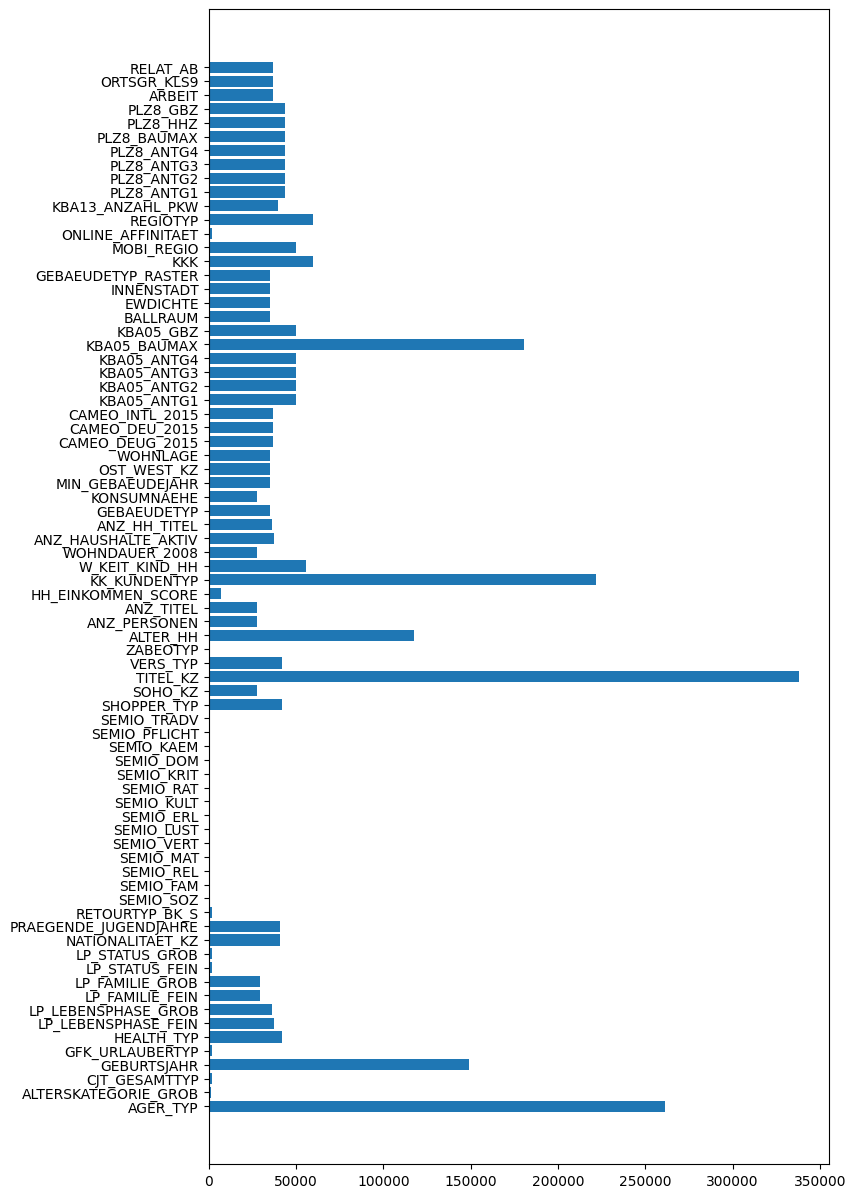

In [ ]:
# Investigate patterns in the amount of missing data in each column.

plt.figure(figsize=(8,15))
plt.barh(na_columns['column_name'], na_columns['missing_count'])

> Outlier columns are: TITEL_KZ, KK_KUNDENTYP, KBA05_BAUTMAX, GEBURTSJAHR, ALTER_HH, and AGER_TYP (6)


In [ ]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)
columns_to_drop = ['TITEL_KZ', 'KK_KUNDENTYP', 'KBA05_BAUMAX', 'GEBURTSJAHR', 'AGER_TYP', 'ALTER_HH']
general_pop.drop(columns=columns_to_drop, axis=1, inplace=True)

#### Discussion 1.1.2: Assess Missing Data in Each Column
There were a couple of columns with no missing data; mostly the ones starting with SEMIO which includes data on how households align with certain personality traits such as being religous, dreamful, materialistic, etc. or FINANZ which includes data on the households financial behavior such as being a home owner, money saver, etc.

The outlier columns with the most amount of missing data are listed above and those 6 columns were all removed from the dataset. The columns include information about:

* TITEL_KZ - Which includes information about a persons acedemic or proffessional title


* KK_KUNDENTYP - Which icnldues information about the type of customer a person is (New, exisitng, regular, stray, etc.


* KBA05_BAUMAX - Which includes information about which kind of residential building is most common in that certain region. (1-2, 3-5, 6-10 family homes, or business buildings)


* GEBURTSJAHR - Which includes information about a persons year of birth


* AGER_TYP - Which includes information about the presence of eldery people in the region


* ALTER_HH - Which includes infromation about the birthdate of the head of the household


#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [ ]:
# How much data is missing in each row of the dataset?
# Create a new row in dataframe with the count of missing values for each row

general_pop['Missing_data_in_rows'] = general_pop.isna().sum(axis=1)

In [ ]:
general_pop.head(2)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,VERS_TYP,ZABEOTYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,Missing_data_in_rows
0,2.0,1,2.0,3,4,3,5,5,3,4,10.0,0,NaN,15.0,4.0,2.0,2.0,1.0,1.0,NaN,NaN,5.0,2.0,6.0,7.0,5.0,1.0,5.0,3.0,3.0,4.0,7.0,6.0,6.0,5.0,3.0,NaN,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43
1,1.0,2,5.0,1,5,2,5,4,5,1,10.0,0,3.0,21.0,6.0,5.0,3.0,2.0,1.0,1.0,14.0,1.0,5.0,4.0,4.0,3.0,1.0,2.0,2.0,3.0,6.0,4.0,7.0,4.0,7.0,6.0,3.0,1.0,2.0,5.0,2.0,0.0,6.0,3.0,9.0,11.0,0.0,8.0,1.0,1992.0,W,4.0,8,8A,51,0.0,0.0,0.0,2.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0,0


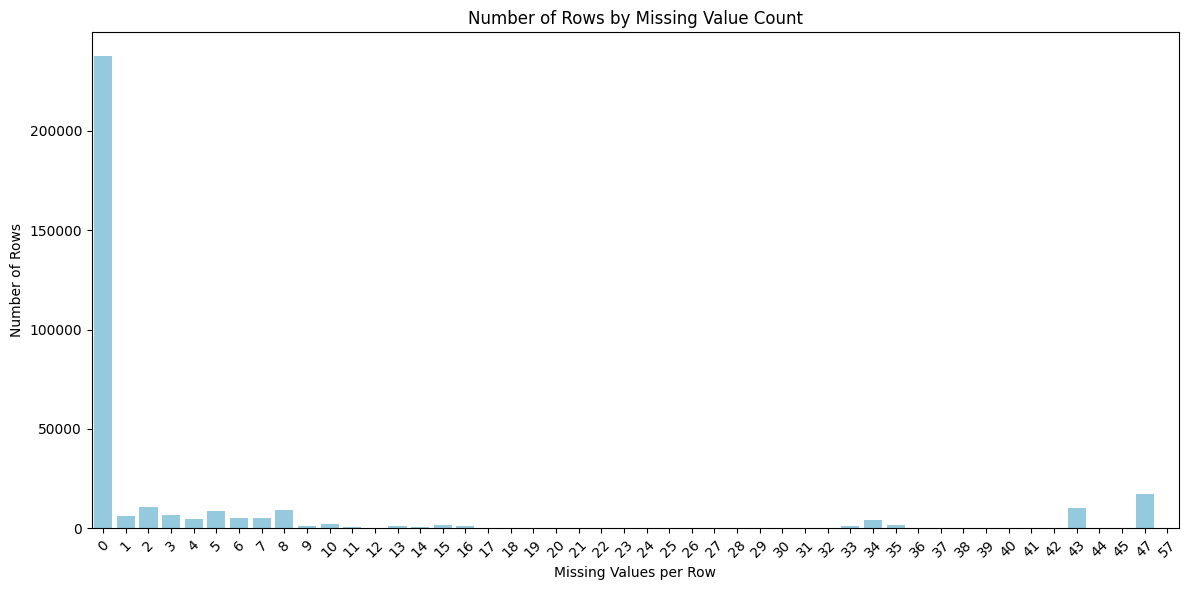

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=general_pop, x='Missing_data_in_rows', color='skyblue')

plt.title('Number of Rows by Missing Value Count')
plt.xlabel('Missing Values per Row')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.

Missing_values_above_threshold = general_pop[general_pop['Missing_data_in_rows'] > 25]
Missing_values_below_threshold = general_pop[general_pop['Missing_data_in_rows'] <= 25]


Text(0, 0.5, 'Number of Rows')

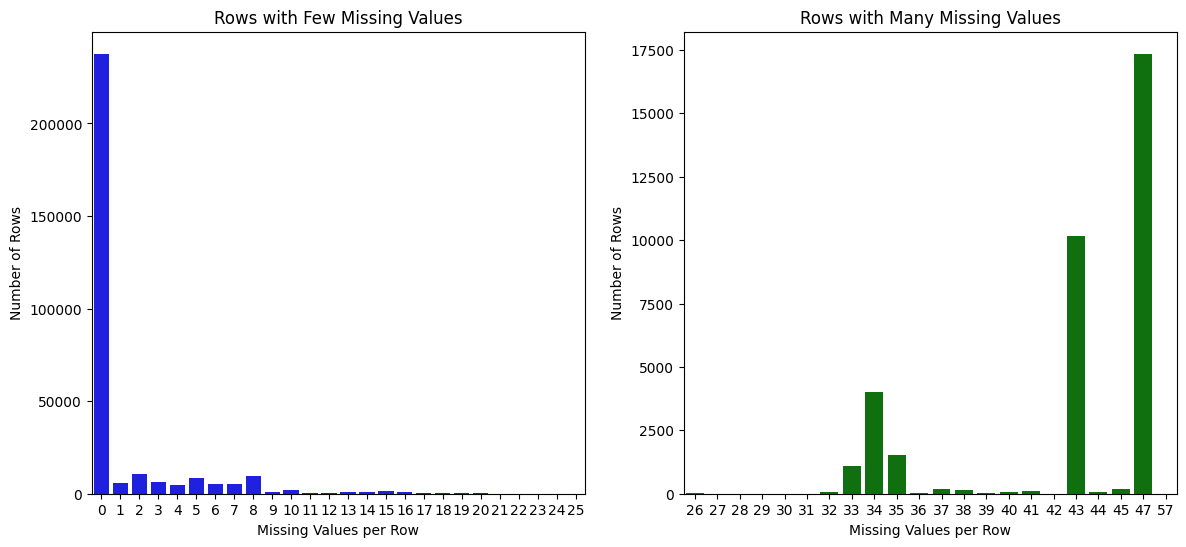

In [ ]:
# Create a subplot to show both plots side-by-side

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Create plot for missing values below threshold
sns.countplot(data=Missing_values_below_threshold, x='Missing_data_in_rows', ax=axes[0], color='blue')
axes[0].set_title('Rows with Few Missing Values')
axes[0].set_xlabel('Missing Values per Row')
axes[0].set_ylabel('Number of Rows')

# Create plot for missing values above threshold
sns.countplot(data=Missing_values_above_threshold, x='Missing_data_in_rows', ax=axes[1], color='green')
axes[1].set_title('Rows with Many Missing Values')
axes[1].set_xlabel('Missing Values per Row')
axes[1].set_ylabel('Number of Rows')

In [ ]:
# Create a list of columns with no missing values
columns_with_no_missing = general_pop.columns[general_pop.isna().sum() == 0].tolist()

In [ ]:
# Columns that have zero missing values
columns_with_no_missing

['ANREDE_KZ',
 'FINANZ_MINIMALIST',
 'FINANZ_SPARER',
 'FINANZ_VORSORGER',
 'FINANZ_ANLEGER',
 'FINANZ_UNAUFFAELLIGER',
 'FINANZ_HAUSBAUER',
 'FINANZTYP',
 'GREEN_AVANTGARDE',
 'Missing_data_in_rows']

In [ ]:
# Select the first 5 columns
selected_columns = columns_with_no_missing[:5]
selected_columns

['ANREDE_KZ',
 'FINANZ_MINIMALIST',
 'FINANZ_SPARER',
 'FINANZ_VORSORGER',
 'FINANZ_ANLEGER']

In [ ]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.

# Create function that takes in both subsets and the columns
def compare_distibutions (Missing_values_below_threshold, Missing_values_above_threshold, columns):
    """
    Input: Both subsets; One with missing values above threshold and the
    other with missing values below threshold and the 5 selected columns to compare.

    Output: Creates a subplot for each of the 5 columns comparing them against the values below and above
    the threshold

    """

    # Create subplots
    fig, axes = plt.subplots(len(columns), 2, figsize=(14, 4 * len(columns)))

    for i, col in enumerate(columns):
        # Left plot: Values below threshold
        sns.countplot(data=Missing_values_below_threshold, x=col, ax=axes[i, 0], color='green')
        axes[i, 0].set_title("Below threshold of missing values")
        axes[i, 0].set_ylabel('Count')
        axes[i, 0].tick_params(axis='x', rotation=45)

        # Right plot: Values above threshold
        sns.countplot(data=Missing_values_above_threshold, x=col, ax=axes[i, 1], color='red')
        axes[i, 1].set_title("Above threshold of missing values")
        axes[i, 1].set_ylabel('Count')
        axes[i, 1].tick_params(axis='x', rotation=45)

    plt.tight_layout()

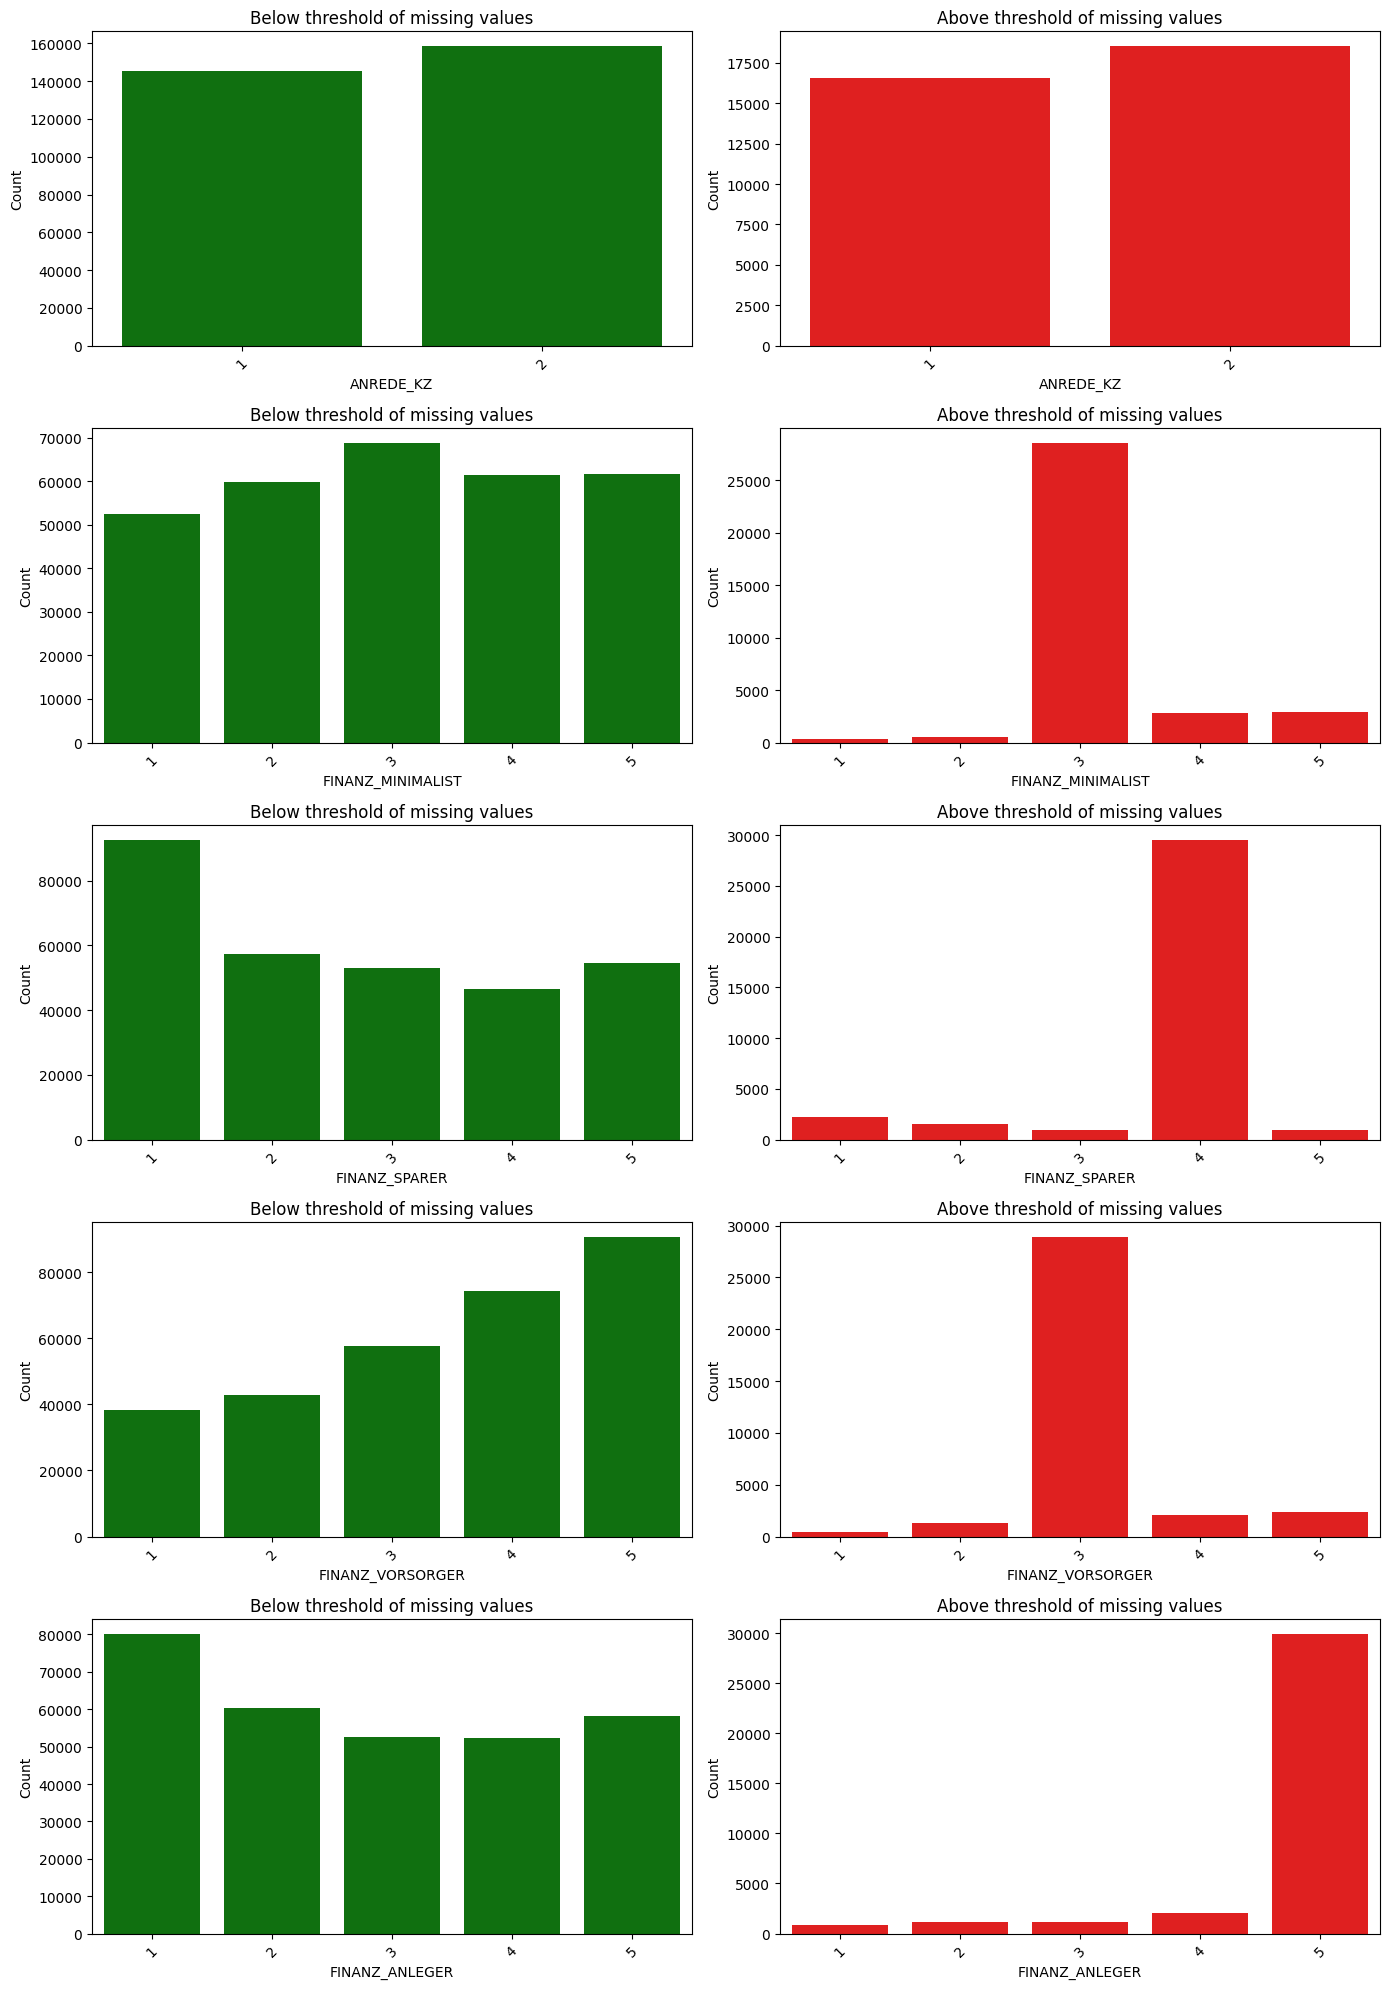

In [ ]:
compare_distibutions(Missing_values_below_threshold, Missing_values_above_threshold, selected_columns)

In [ ]:
# Countinuing with the subset of few/no missing values
general_pop = Missing_values_below_threshold

#### Discussion 1.1.3: Assess Missing Data in Each Row
There is a majority of the rows with 0 missing values, and then others with anywhere between 1-47 missing values.

> The data with a lot of missing values (plots in red) are very differnt from the data with few or no missing values (plots in green). The red plots are much smaller than the other subset; except the ANREDE_KZ column.

> Since the distributions of the 5 columns (with zero NaN values) are not similar between the two subsets; this would cause some issues if we decided to remove these rows from the data.

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [ ]:
# Show differnt data types
feature_info['type'].unique()

array(['categorical', 'ordinal', 'numeric', 'mixed', 'interval'],
      dtype=object)

In [ ]:
# How many features are there of each data type?
# Show Counts of each datatype
cat_count = (feature_info['type'] == 'categorical').sum()
ord_count = (feature_info['type'] == 'ordinal').sum()
num_count = (feature_info['type'] == 'numeric').sum()
mixed_count = (feature_info['type'] == 'mixed').sum()
inter_count = (feature_info['type'] == 'interval').sum()

print(f' There are {cat_count} features with a Categorical data type.')
print(f' There are {ord_count} features with a Ordinal data type.')
print(f' There are {num_count} features with a Numeric data type.')
print(f' There are {mixed_count} features with a Mixed data type.')
print(f' There are {inter_count} features with a Interval data type.')

 There are 21 features with a Categorical data type.
 There are 49 features with a Ordinal data type.
 There are 7 features with a Numeric data type.
 There are 7 features with a Mixed data type.
 There are 1 features with a Interval data type.


In [ ]:
# Another way to show how many features are of each data type
feature_info['type'].value_counts()

,count
type,
ordinal,49
categorical,21
numeric,7
mixed,7
interval,1


#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [ ]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

binary = []
multi_level = []

for _, row in feature_info.iterrows():
    if row['type'] == 'categorical':
        col = row['attribute']
        if col in general_pop.columns:
            values = general_pop[col].nunique()
            if values == 2:
                binary.append(col)
            else:
                multi_level.append(col)
            print(f"{col}: {values}") # Prints all categorical features (21) with the number of variables

ANREDE_KZ: 2
CJT_GESAMTTYP: 6
FINANZTYP: 6
GFK_URLAUBERTYP: 12
GREEN_AVANTGARDE: 2
LP_FAMILIE_FEIN: 11
LP_FAMILIE_GROB: 5
LP_STATUS_FEIN: 10
LP_STATUS_GROB: 5
NATIONALITAET_KZ: 3
SHOPPER_TYP: 4
SOHO_KZ: 2
VERS_TYP: 2
ZABEOTYP: 6
GEBAEUDETYP: 6
OST_WEST_KZ: 2
CAMEO_DEUG_2015: 19
CAMEO_DEU_2015: 45


In [ ]:
# Show binary categroical variables
binary

['ANREDE_KZ', 'GREEN_AVANTGARDE', 'SOHO_KZ', 'VERS_TYP', 'OST_WEST_KZ']

In [ ]:
# Show multi-level categroical variables
multi_level

['CJT_GESAMTTYP',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_STATUS_FEIN',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'SHOPPER_TYP',
 'ZABEOTYP',
 'GEBAEUDETYP',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015']

In [ ]:
# Check binary varibales to see if any need to be encoded
general_pop[binary].head()

,ANREDE_KZ,GREEN_AVANTGARDE,SOHO_KZ,VERS_TYP,OST_WEST_KZ
1,2,0,1.0,2.0,W
2,2,1,0.0,1.0,W
3,2,0,0.0,1.0,W
4,1,0,0.0,2.0,W
5,2,0,0.0,2.0,W


> The OST_WEST_KZ variable's values need to be encoded to numbers or dummy variables (Right now the variable is the letter 'W' for West Germany or the letter 'O' for East Germany)

In [ ]:
# Re-encode categorical variable(s) to be kept in the analysis.

# Re-encoding the binary categorical variable (For OST_WEST_KZ)
general_pop = pd.get_dummies(general_pop, columns=['OST_WEST_KZ'])

In [ ]:
# Show the dummy variable for 'OST_WEST_KZ' column
general_pop[['OST_WEST_KZ_O', 'OST_WEST_KZ_W']].head()

,OST_WEST_KZ_O,OST_WEST_KZ_W
1,False,True
2,False,True
3,False,True
4,False,True
5,False,True


In [ ]:
# Look at multi-level variables
general_pop[multi_level].head()

,CJT_GESAMTTYP,FINANZTYP,GFK_URLAUBERTYP,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,SHOPPER_TYP,ZABEOTYP,GEBAEUDETYP,CAMEO_DEUG_2015,CAMEO_DEU_2015
1,5.0,1,10.0,5.0,3.0,2.0,1.0,1.0,3.0,5.0,8.0,8,8A
2,3.0,1,10.0,1.0,1.0,3.0,2.0,1.0,2.0,5.0,1.0,4,4C
3,2.0,6,1.0,NaN,NaN,9.0,4.0,1.0,1.0,3.0,1.0,2,2A
4,5.0,5,5.0,10.0,5.0,3.0,2.0,1.0,2.0,4.0,1.0,6,6B
5,2.0,2,1.0,1.0,1.0,4.0,2.0,1.0,0.0,4.0,1.0,8,8C


> In order to choose whether I will drop or encode (using dummy varibles) the multi-level categorical values; I will only keep the ones with 4 or less categories to reduce the number of dummy variables needed.

> I will also be looking at the data dictonary to see if any of the variables are important for the anaysis and need to be kept.

In [ ]:
# Show number of catgeories in each categorical variable
general_pop[multi_level].nunique()

,0
CJT_GESAMTTYP,6
FINANZTYP,6
GFK_URLAUBERTYP,12
LP_FAMILIE_FEIN,11
LP_FAMILIE_GROB,5
LP_STATUS_FEIN,10
LP_STATUS_GROB,5
NATIONALITAET_KZ,3
SHOPPER_TYP,4
ZABEOTYP,6


There are 2 multi-level categorical variables that have 4 or less values that I will keep.
* NATIONALITAET_KZ - Tells us the nationality of an individual based on name analysis
* SHOPPER_TYP - Which tells us the type of shopping behavior an individual has

Looking at the data dictionary, there are a few more variables that I am going to keep beacuase they are relevant to the analysis:
* CJT_GESAMTTYP - Shows an individuals preferred buying channels (How they buy information)
* FINANZTYP - Shows the descriptive financial type of an individual
* LP_FAMILIE_FEIN - Shows the family type (single, couple, children, etc.)
* LP_STATUS_FEIN - Shows the social status of an individual on a fine scale


I am going to drop the following columns:
* GFK_URLAUBERTYP - This shows the vacation habits of a household (Travelers, hikers, connoisseurs, no vacation, etc.)
* LP_FAMILIE_GROB - This shows the fmaily type but in a broader scale (Im keeping the more detailed column)
* LP_STATUS_GROB - This shows the social status but in a broader scale (Im keeping the more detailed column)
* ZABEOTYP - Shows the energy consumption patterns
* GEBAEUDETYP - This shows the type of building (Residential v.s commercial)
* CAMEO_DEUG_2015 - This shows the welath/ life statge of an indivudal but in a broader scale
* CAMEO_DEU_2015 - Shows the welath/ life statge of an individual in a fine scale (Working, starting a fmaily, retirement, etc.): While this column could be important for the analysis, I am going to drop it due to it having a higher number of dummy variables (20+)

In [ ]:
# Drop the following 7 categorical variables:
drop_columns = ['GFK_URLAUBERTYP', 'LP_FAMILIE_GROB', 'LP_STATUS_GROB', 'ZABEOTYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']
general_pop.drop(columns=drop_columns, axis=1, inplace=True)

In [ ]:
# Change multi_level list to only the variables that will be kept
for col in ['GFK_URLAUBERTYP', 'LP_FAMILIE_GROB', 'LP_STATUS_GROB', 'ZABEOTYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']:
    multi_level.remove(col)

In [ ]:
# The 6 multi_level categorical features to keep
multi_level

['CJT_GESAMTTYP',
 'FINANZTYP',
 'LP_FAMILIE_FEIN',
 'LP_STATUS_FEIN',
 'NATIONALITAET_KZ',
 'SHOPPER_TYP']

In [ ]:
# Re-encode multi-level categorical variable(s) to be kept in the analysis.

general_pop = pd.get_dummies(general_pop, columns=multi_level)

In [ ]:
general_pop.head(2)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,VERS_TYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,KONSUMNAEHE,MIN_GEBAEUDEJAHR,WOHNLAGE,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,Missing_data_in_rows,OST_WEST_KZ_O,OST_WEST_KZ_W,CJT_GESAMTTYP_1.0,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0,FINANZTYP_1,FINANZTYP_2,FINANZTYP_3,FINANZTYP_4,FINANZTYP_5,FINANZTYP_6,LP_FAMILIE_FEIN_1.0,LP_FAMILIE_FEIN_2.0,LP_FAMILIE_FEIN_3.0,LP_FAMILIE_FEIN_4.0,LP_FAMILIE_FEIN_5.0,LP_FAMILIE_FEIN_6.0,LP_FAMILIE_FEIN_7.0,LP_FAMILIE_FEIN_8.0,LP_FAMILIE_FEIN_9.0,LP_FAMILIE_FEIN_10.0,LP_FAMILIE_FEIN_11.0,LP_STATUS_FEIN_1.0,LP_STATUS_FEIN_2.0,LP_STATUS_FEIN_3.0,LP_STATUS_FEIN_4.0,LP_STATUS_FEIN_5.0,LP_STATUS_FEIN_6.0,LP_STATUS_FEIN_7.0,LP_STATUS_FEIN_8.0,LP_STATUS_FEIN_9.0,LP_STATUS_FEIN_10.0,NATIONALITAET_KZ_1.0,NATIONALITAET_KZ_2.0,NATIONALITAET_KZ_3.0,SHOPPER_TYP_0.0,SHOPPER_TYP_1.0,SHOPPER_TYP_2.0,SHOPPER_TYP_3.0
1,1.0,2,1,5,2,5,4,5,0,3.0,21.0,6.0,14.0,1.0,5.0,4.0,4.0,3.0,1.0,2.0,2.0,3.0,6.0,4.0,7.0,4.0,7.0,6.0,1.0,2.0,2.0,0.0,6.0,3.0,9.0,11.0,0.0,1.0,1992.0,4.0,51,0.0,0.0,0.0,2.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0,0,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
2,3.0,2,1,4,1,2,3,5,1,3.0,3.0,1.0,15.0,3.0,4.0,1.0,3.0,3.0,4.0,4.0,6.0,3.0,4.0,7.0,7.0,7.0,3.0,3.0,0.0,1.0,1.0,0.0,4.0,3.0,9.0,10.0,0.0,5.0,1992.0,2.0,24,1.0,3.0,1.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0,0,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False


#### Discussion 1.2.1: Re-Encode Categorical Features
For the categorical variables, we looked at the binary (2 values) and multi-level (More than 2 values) variables.

> Out of all 5 binary variables; only 1 of them needed to be encoded with a dummy variable; which is the OST_WEST_KZ variable. This variable needs to be encoded to numbers to convert the letter 'W' and letter 'O'.

> Out of all 13 multi-level categorical variables; I kept 6 of them. The information about what each variable means is listed above, as well as the columns I dropped (7) and the reasons why they were not kept.

> The 6 columns that I kept were then re-encoded with dummy variables.

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [ ]:
# Print columns that have data type 'mixed'
for _, row in feature_info.iterrows():
    if row['type'] == 'mixed':
        col = row['attribute']
        print(col)

LP_LEBENSPHASE_FEIN
LP_LEBENSPHASE_GROB
PRAEGENDE_JUGENDJAHRE
WOHNLAGE
CAMEO_INTL_2015
KBA05_BAUMAX
PLZ8_BAUMAX


In [ ]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.

general_pop['PRAEGENDE_JUGENDJAHRE'].unique() # The values for this variable are the numbers 1-15

array([14., 15.,  8.,  3., 10., 11.,  5.,  9.,  6.,  4., nan,  2.,  1.,
       12., 13.,  7.])

In [ ]:
PRA_decade = []
PRA_movement = []

# Create a new variable (PRA_decade) for decade information
for val in general_pop['PRAEGENDE_JUGENDJAHRE']:
    if val in [1, 2]:
        PRA_decade.append(40)
    elif val in [3, 4]:
        PRA_decade.append(50)
    elif val in [5, 6, 7]:
        PRA_decade.append(60)
    elif val in [8, 9]:
        PRA_decade.append(70)
    elif val in [10, 11, 12, 13]:
        PRA_decade.append(80)
    elif val in [14, 15]:
        PRA_decade.append(90)
    else:
        PRA_decade.append(np.nan)

# Create a new variable (PRA_movement) for movement information
for val in general_pop['PRAEGENDE_JUGENDJAHRE']:
    if val in [1, 3, 5, 8, 10, 12, 14]:
        PRA_movement.append(0)
    elif val in [2, 4, 6, 7, 9, 11, 13, 15]:
        PRA_movement.append(1)
    else:
        PRA_movement.append(np.nan)

In [ ]:
# Add two new variables to the dataframe and remove the 'PRAEGENDE_JUGENDJAHRE' variable
general_pop['Decade'] = PRA_decade
general_pop['Movement'] = PRA_movement

general_pop.drop(columns='PRAEGENDE_JUGENDJAHRE', inplace=True)

In [ ]:
general_pop[['Decade', 'Movement']].head()

,Decade,Movement
1,90.0,0.0
2,90.0,1.0
3,70.0,0.0
4,70.0,0.0
5,50.0,0.0


In [ ]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
CAMEO_wealth = []
CAMEO_lifestage = []

# Creating variable for wealth status
for val in general_pop['CAMEO_INTL_2015']:
    try:
        val = int(val)
        val = val // 10 # tens digit
        if val == 1:
            CAMEO_wealth.append(1)
        elif val == 2:
            CAMEO_wealth.append(2)
        elif vall == 3:
            CAMEO_wealth.append(3)
        elif val == 4:
            CAMEO_wealth.append(4)
        elif val == 5:
            CAMEO_wealth.append(5)
        else:
            CAMEO_wealth.append(np.nan)
    except:
        CAMEO_wealth.append(np.nan)

# Creating variable for lifestage
for val in general_pop['CAMEO_INTL_2015']:
    try:
        val = int(val)
        val = val % 10 # ones digit
        if val == 1:
            CAMEO_lifestage.append(1)
        elif val == 2:
            CAMEO_lifestage.append(2)
        elif vall == 3:
            CAMEO_lifestage.append(3)
        elif val == 4:
            CAMEO_lifestage.append(4)
        elif val == 5:
            CAMEO_lifestage.append(5)
        else:
            CAMEO_lifestage.append(np.nan)
    except:
        CAMEO_lifestage.append(np.nan)

In [ ]:
# Add two new variables to the dataframe and remove the 'CAMEO_INTL_2015' variable
general_pop['Wealth_Status'] = CAMEO_wealth
general_pop['Life_Stage'] = CAMEO_lifestage

general_pop.drop(columns='CAMEO_INTL_2015', inplace=True)

In [ ]:
general_pop[['Wealth_Status', 'Life_Stage']].head()

,Wealth_Status,Life_Stage
1,NaN,1.0
2,2.0,NaN
3,1.0,2.0
4,NaN,NaN
5,NaN,NaN


### I'm Looking at the rest of the mixed variables to see what to keep or what to delete
The other mixed variables inlcude:
* LP_LEBENSPHASE_FEIN - Which shows life stage information on a rough scale (Do not need because we already have information on life stage)
* LP_LEBENSPHASE_GROB - Whcih shows life stage infromaioton on a fine scale (Do not need because we already have information on life stage)
* WOHNLAGE - Which Shows Neighborhood quality; this is releveant for analysis so I will be keeping this column.
* KBA05_BAUMAX - Which shows the most common building type (This is not needed because there are other columns that have informaiton on the number of family homes)
* PLZ8_BAUMAX - Which shows the common buiding type in the PLZ8 region (This is also not neded because there are other columns that go into more detail about this)

In [ ]:
# Drop the columns I am not keeping
columns_to_drop = ['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'PLZ8_BAUMAX']

general_pop.drop(columns=columns_to_drop, inplace=True)

#### Discussion 1.2.2: Engineer Mixed-Type Features
There were 7 features that were considered to be mixed-type; 2 of them combined information into 1 feature so I needed to engineer new features to break up the information. Then, I added the 2 new features into the data frame and deleted the original feature. The 2 mixed-type features were:

* PRAEGENDE_JUGENDJAHRE - which combined the generation by decade and movement. (Needs 2 features; one for decade and one for movement)


* CAMEO_INTL_2015 - Which combines information about a persons wealth and life status (Also, needs 2 new features; one for wealth status and one for life status)

Out of the other 5 mixed-typed features, I only kept one of them (WOHNLAGE) which does not need to be encoded with dummy variables because the data is already ordinal.

The other 4 columns were dropped, except KBA05_BAUMAX because it was already dropped.



#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [ ]:
general_pop.shape

(303721, 107)

In [ ]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)

# Make sure "PRAEGENDE_JUGENDJAHRE" and "CAMEO_INTL_2015" are removed from the dataframe
if 'PRAEGENDE_JUGENDJAHRE' in general_pop.columns and 'CAMEO_INTL_2015' in general_pop.columns:
    print("Both columns exist!")
else:
    print("Both columns are missing.")

Both columns are missing.


In [ ]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.

general_pop.dtypes

,0
ALTERSKATEGORIE_GROB,float64
ANREDE_KZ,int64
FINANZ_MINIMALIST,int64
FINANZ_SPARER,int64
FINANZ_VORSORGER,int64
FINANZ_ANLEGER,int64
FINANZ_UNAUFFAELLIGER,int64
FINANZ_HAUSBAUER,int64
GREEN_AVANTGARDE,int64
HEALTH_TYP,float64


### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [ ]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data

    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """


    feature_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep=';')
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...

    print('Read in dataset')

    # Parse string of missing values to a list of strings
    def try_parse_int(x):
        x = x.strip()
        try:
            return int(x)
        except ValueError:
            return None

    feature_info['missing_or_unknown'] = feature_info['missing_or_unknown'].str.strip('[]').str.split(',').apply(lambda lst: [try_parse_int(x) for x in lst if try_parse_int(x) is not None])

    # Convert 'missing' or 'unknown' values to NA
    for index, row in feature_info.iterrows():
        col_name = row['attribute']
        missing_values = row['missing_or_unknown']

        if col_name in df.columns and missing_values:
            df[col_name] = df[col_name].replace(missing_values, np.nan)

    print('Convert missing or unknown values')

    # remove selected columns and rows, ...
    columns_to_drop = ['TITEL_KZ', 'KK_KUNDENTYP', 'KBA05_BAUMAX', 'GEBURTSJAHR', 'AGER_TYP', 'ALTER_HH']

    for col in columns_to_drop:
        if col in df.columns:
            df.drop(columns=col, axis=1, inplace=True)

    print('Remove selected rows and columns')

    # select, re-encode, and engineer column values.

    # Sepearte categorical variables into binary and multi-level variables
    binary = []
    multi_level = []

    for _, row in feature_info.iterrows():
        if row['type'] == 'categorical':
            col = row['attribute']
            if col in df.columns:
                values = df[col].nunique()
                if values == 2:
                    binary.append(col)
                else:
                    multi_level.append(col)

    print('Seperate multi-level/binary variables into two seperate lists')

    # Re-encoding the binary categorical variable (For OST_WEST_KZ)
    df = pd.get_dummies(df, columns=['OST_WEST_KZ'])


    print('Rencoded binary categorical variables')

    # Drop the following 7 categorical variables:
    drop_columns = ['GFK_URLAUBERTYP', 'LP_FAMILIE_GROB', 'LP_STATUS_GROB', 'ZABEOTYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']
    df.drop(columns=drop_columns, axis=1, inplace=True)

    # Change multi_level list to only the variables that will be kept
    for col in ['GFK_URLAUBERTYP', 'LP_FAMILIE_GROB', 'LP_STATUS_GROB', 'ZABEOTYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']:
        if col in multi_level:
            multi_level.remove(col)


    print('Change multi-level list to only the ones being kept')

    # Re-encode multi-level categorical variable(s) to be kept in the analysis.
    df = pd.get_dummies(df, columns=multi_level)


    print('Rencoded multi-level categorical variables')

    # Engineer new columns for 'PRAEGENDE_JUGENDJAHRE'
    PRA_decade = []
    PRA_movement = []

    # Create a new variable (PRA_decade) for decade information
    for val in df['PRAEGENDE_JUGENDJAHRE']:
        if val in [1, 2]:
            PRA_decade.append(40)
        elif val in [3, 4]:
            PRA_decade.append(50)
        elif val in [5, 6, 7]:
            PRA_decade.append(60)
        elif val in [8, 9]:
            PRA_decade.append(70)
        elif val in [10, 11, 12, 13]:
            PRA_decade.append(80)
        elif val in [14, 15]:
            PRA_decade.append(90)
        else:
            PRA_decade.append(np.nan)

    print('Create variable for Decade')

    # Create a new variable (PRA_movement) for movement information
    for val in df['PRAEGENDE_JUGENDJAHRE']:
        if val in [1, 3, 5, 8, 10, 12, 14]:
            PRA_movement.append(0)
        elif val in [2, 4, 6, 7, 9, 11, 13, 15]:
            PRA_movement.append(1)
        else:
            PRA_movement.append(np.nan)

    print('Create variable for Movement')

    # Add two new variables to the dataframe and remove the 'PRAEGENDE_JUGENDJAHRE' variable
    df['Decade'] = PRA_decade
    df['Movement'] = PRA_movement

    df.drop(columns='PRAEGENDE_JUGENDJAHRE', inplace=True)


    print('Added both engineered variables to data frame and deleted the original feature')


    # Engineer new columns for 'CAMEO_INTL_2015'
    CAMEO_wealth = []
    CAMEO_lifestage = []

    # Creating variable for wealth status
    for val in df['CAMEO_INTL_2015']:
        try:
            val = int(val)
            val = val // 10 # tens digit
            if val == 1:
                CAMEO_wealth.append(1)
            elif val == 2:
                CAMEO_wealth.append(2)
            elif val == 3:
                CAMEO_wealth.append(3)
            elif val == 4:
                CAMEO_wealth.append(4)
            elif val == 5:
                CAMEO_wealth.append(5)
            else:
                CAMEO_wealth.append(np.nan)
        except:
            CAMEO_wealth.append(np.nan)

    print('Create variable for Wealth Status')

    # Creating variable for lifestage
    for val in df['CAMEO_INTL_2015']:
        try:
            val = int(val)
            val = val % 10 # ones digit
            if val == 1:
                CAMEO_lifestage.append(1)
            elif val == 2:
                CAMEO_lifestage.append(2)
            elif val == 3:
                CAMEO_lifestage.append(3)
            elif val == 4:
                CAMEO_lifestage.append(4)
            elif val == 5:
                CAMEO_lifestage.append(5)
            else:
                CAMEO_lifestage.append(np.nan)
        except:
            CAMEO_lifestage.append(np.nan)

    print('Created variable for Life Stage')

    # Add two new variables to the dataframe and remove the 'CAMEO_INTL_2015' variable
    df['Wealth_Status'] = CAMEO_wealth
    df['Life_Stage'] = CAMEO_lifestage

    df.drop(columns='CAMEO_INTL_2015', inplace=True)

    print('Added both engineered variables to data frame and deleted the original feature')


    # Look at the rest of the mixed variables (To keep or to drop)
    columns_to_drop = ['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'PLZ8_BAUMAX']

    df.drop(columns=columns_to_drop, inplace=True)


    print('Removed mixed type features')

    print(f'Number of features {df.shape}')

    # Return the cleaned dataframe.
    return df

    print('Dataframe returned')

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](https://scikit-learn.org/0.16/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [ ]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.

# Imputting missing values with the median
imputer = SimpleImputer(strategy='median')

general_pop1 = imputer.fit_transform(general_pop)


In [ ]:
# Apply feature scaling to the general population demographics data.
scaler = StandardScaler()

general_pop1 = scaler.fit_transform(general_pop1)


### Discussion 2.1: Apply Feature Scaling
First, I used an imputer to replace all missing values with the median of all values.

Then, I applied feature scaling to the general population data using StandardScaler() which removes the mean of each feature so that it equals 0 and the standard deviation equals 1. This is used to normalize the range of independent features so that they contribute equally to the models performance regardless of the range of values.


### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [ ]:
# Apply PCA to the data.
pca = PCA()

X_pca = pca.fit_transform(general_pop1)


In [ ]:
# Investigate the variance accounted for by each principal component.
pca.explained_variance_ratio_


array([1.11557277e-01, 9.23558390e-02, 6.19144171e-02, 4.19848443e-02,
       2.86679234e-02, 2.28022165e-02, 2.18889456e-02, 2.07746539e-02,
       1.90794533e-02, 1.80549955e-02, 1.70803854e-02, 1.64379564e-02,
       1.49466587e-02, 1.48535666e-02, 1.35867794e-02, 1.29850167e-02,
       1.25457318e-02, 1.23112653e-02, 1.21726113e-02, 1.18783731e-02,
       1.16892930e-02, 1.14548665e-02, 1.10810806e-02, 1.09943464e-02,
       1.09337464e-02, 1.07552637e-02, 1.04826648e-02, 1.02087484e-02,
       1.01392104e-02, 9.97232986e-03, 9.88198098e-03, 9.73470442e-03,
       9.59550226e-03, 9.54322205e-03, 9.48876097e-03, 9.46301986e-03,
       9.43097431e-03, 9.33131902e-03, 9.24321049e-03, 9.16728488e-03,
       9.03269932e-03, 8.75399469e-03, 8.62416943e-03, 8.51172438e-03,
       8.14382096e-03, 7.98242048e-03, 7.60496277e-03, 7.39376784e-03,
       7.00770587e-03, 6.82486548e-03, 6.69092115e-03, 6.35753830e-03,
       6.04445544e-03, 5.92506631e-03, 5.55458000e-03, 5.25522425e-03,
      

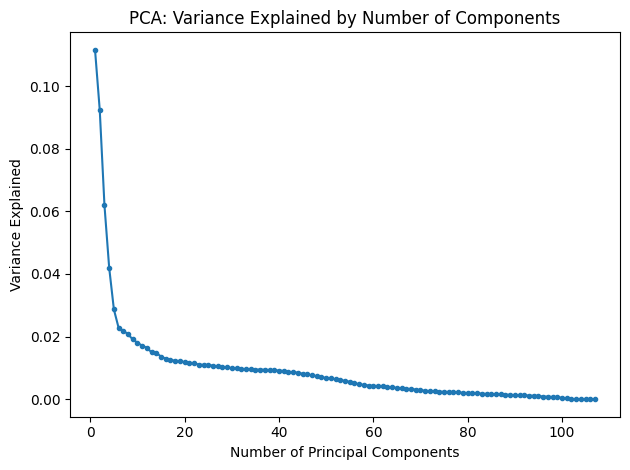

In [ ]:
# Plot the variance exlpained ratio
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='.')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.title('PCA: Variance Explained by Number of Components')
plt.tight_layout()
plt.show()

In [ ]:
# The cummalitve varaince explained
cumulative_var = np.cumsum(pca.explained_variance_ratio_)
cumulative_var

array([0.11155728, 0.20391312, 0.26582753, 0.30781238, 0.3364803 ,
       0.35928252, 0.38117146, 0.40194612, 0.42102557, 0.43908057,
       0.45616095, 0.47259891, 0.48754557, 0.50239913, 0.51598591,
       0.52897093, 0.54151666, 0.55382793, 0.56600054, 0.57787891,
       0.5895682 , 0.60102307, 0.61210415, 0.6230985 , 0.63403224,
       0.64478751, 0.65527017, 0.66547892, 0.67561813, 0.68559046,
       0.69547244, 0.70520715, 0.71480265, 0.72434587, 0.73383463,
       0.74329765, 0.75272863, 0.76205994, 0.77130315, 0.78047044,
       0.78950314, 0.79825713, 0.8068813 , 0.81539303, 0.82353685,
       0.83151927, 0.83912423, 0.846518  , 0.85352571, 0.86035057,
       0.86704149, 0.87339903, 0.87944349, 0.88536855, 0.89092313,
       0.89617836, 0.90088933, 0.90550282, 0.90987908, 0.91414027,
       0.91836703, 0.92258726, 0.92651239, 0.93033099, 0.93395139,
       0.93749756, 0.94083792, 0.94411932, 0.94722114, 0.95009119,
       0.95283934, 0.95541786, 0.95798407, 0.96043163, 0.96279

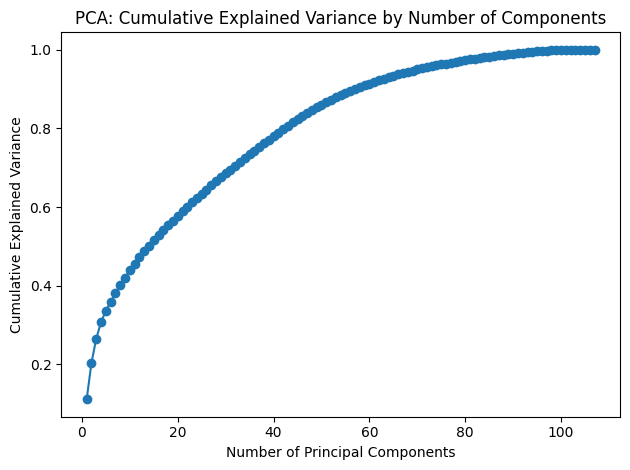

In [ ]:
# Plot the cummalitive variance exlpained
plt.plot(range(1, len(cumulative_var) + 1), cumulative_var, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Cumulative Explained Variance by Number of Components')
plt.tight_layout()
plt.show()

In [ ]:
general_pop1.shape

(303721, 107)

In [ ]:
# Re-apply PCA to the data while selecting for number of components to retain.

pca = PCA(n_components=20, random_state=42)

X_pca = pca.fit_transform(general_pop1)

### Discussion 2.2: Perform Dimensionality Reduction
When performing PCA, the total variance explained tells us how much information is captured by that component only.

So, when looking at the individual variance explained, you can see the 'elbow' in the graph is around 15-20 which means that after 20 components; each additional component explains a very small amount of information about the data. (They will most likley represent noise, redundant or less important information)

Reducing the dimmensions will improve the models speed and performance, and prevent overfitting.

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [ ]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.

feature_names = general_pop.columns

def display_weights (pca, feature_names, component_index):
    component_weights = pca.components_[component_index]

    return pd.DataFrame({
        'feature': feature_names,
        'weight': component_weights
    }).sort_values(by='weight')



print("PC1 - Feature Weights:")
display_weights(pca, feature_names, 0)


PC1 - Feature Weights:


,feature,weight
53,PLZ8_ANTG3,-0.193854
54,PLZ8_ANTG4,-0.187208
29,HH_EINKOMMEN_SCORE,-0.185925
3,FINANZ_SPARER,-0.173722
58,ORTSGR_KLS9,-0.171570
43,EWDICHTE,-0.169518
69,FINANZTYP_1,-0.154543
87,LP_STATUS_FEIN_2.0,-0.145451
7,FINANZ_HAUSBAUER,-0.144919
23,SEMIO_PFLICHT,-0.137744


In [ ]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.

print("PC2 - Feature Weights:")
display_weights(pca, feature_names, 1)


PC2 - Feature Weights:


,feature,weight
0,ALTERSKATEGORIE_GROB,-0.218912
4,FINANZ_VORSORGER,-0.203281
17,SEMIO_ERL,-0.181333
10,RETOURTYP_BK_S,-0.156340
16,SEMIO_LUST,-0.155989
86,LP_STATUS_FEIN_1.0,-0.131474
30,W_KEIT_KIND_HH,-0.129869
7,FINANZ_HAUSBAUER,-0.129487
53,PLZ8_ANTG3,-0.121620
43,EWDICHTE,-0.120194


In [ ]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.

print("PC3 - Feature Weights:")
display_weights(pca, feature_names, 2)


PC3 - Feature Weights:


,feature,weight
15,SEMIO_VERT,-0.328450
12,SEMIO_FAM,-0.262023
11,SEMIO_SOZ,-0.261430
18,SEMIO_KULT,-0.252232
73,FINANZTYP_5,-0.140138
2,FINANZ_MINIMALIST,-0.133414
99,SHOPPER_TYP_0.0,-0.126795
13,SEMIO_REL,-0.104416
10,RETOURTYP_BK_S,-0.081936
14,SEMIO_MAT,-0.080707


### Discussion 2.3: Interpret Principal Components
Now, we will be looking at the weights for the first 3 principal components (The ones that yield the most information) The weights tell us how much of each feature contributes to the principal component.

1) For the first PC, Its positively influenced by:
* FINANZ_MINIMALIST - Which includes the financial behavior of the people (investor, money-saver, low financial interest, etc.


* MOBI_REGIO - Which includes information about the movement patterns in the region


* KBA05_ANTG1 - Which includes the number of 1-2 family houses in the region

and negatively infleuced by:
* PLZ8_ANTG3 - Which includes the number of 6-10 family houses in the PLZ8 region.


* PLZ8_ANTG4 - Which includes the number of 10+ family houses in the PLZ8 region


* HH_EINKOMMEN_SCORE - Which includes the estimated household net income

For example, looking at the weights, we can see that since the number of family houses (PLZ8_ANTG3) is largely negative and the financial behavior (FINANZ_MINIMALIST) is positive; then an incease in the number of houses tends to decrease the financial behavior of the household.

2) For the second PC, its positively influenced by:
* Decade - Which includes the generation by decade


* FINANZ_UNAUFFAELLIGER - Which includes the financial behavior of the people


* SEMIO_REL - Which includes data on how households align with certain personality traits such as being family-minded, socially-minded, sensual-minded, etc.

and negatively influenced by:
* ALTERSKATEGORIE_GROB - Which includes the estimated age of a person based on name analysis  


* FINANZ_VORSORGER - Which includes peoples financial behavior  


* SEMIO_ERL - Which includes data on how households align with certain personality traits such as being religous, dreamful, materialistic, etc.

For example, looking at the weights, we can see that since the estimated age of a person (ALTERSKATEGORIE_GROB) is negative and the financial behavior (FINANZ_VORSORGER) is also negative; then an incease in a persons age tends to increase their financial behavior.

3) For the third PC, its positively influenced by:
* ANDREDE_KZ - Which includes the persons gender


* SEMIO_KEAM - Which includes data on how households align with certain personality traits such as being religous, dreamful, family-minded, etc.


* SEMIO_DOM - Which includes data on how households align with certain personality traits such as being religous, dreamful, materialistic, etc.

and negatively influenced by:
* SEMIO_VERT - Which includes data on how households align with certain personality traits such as being event-oriented, religious, materialistic, etc.


* SEMIO_FAM - Which includes data on how households align with certain personality traits such as being religous, socially-minded, materialistic, etc.


* SEMIO_SOZ - Which includes data on how households align with certain personality traits such as being sensual-minded, event-oriented, religous, etc.


## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [ ]:
# Over a number of different cluster counts...
scores = []
clusters = list(range(1,11))

def run_kmeans_score(X_pca, cluster): # run k-means clustering on the data and...
    model = KMeans(n_clusters=cluster)
    model.fit(X_pca)
    # compute the average within-cluster distances.
    score = np.sqrt(-model.score(X_pca) / X_pca.shape[0])
    return score

for i in clusters:
    scores.append(run_kmeans_score(X_pca, i))



In [ ]:
scores

[np.float64(7.863398974111968),
 np.float64(7.277947745153591),
 np.float64(6.911381133258973),
 np.float64(6.692940019025308),
 np.float64(6.559617971251217),
 np.float64(6.3998679630860185),
 np.float64(6.299502424959934),
 np.float64(6.162880473074473),
 np.float64(6.088542331946183),
 np.float64(6.041399392190842)]

Text(0, 0.5, 'Average distance to cluster center')

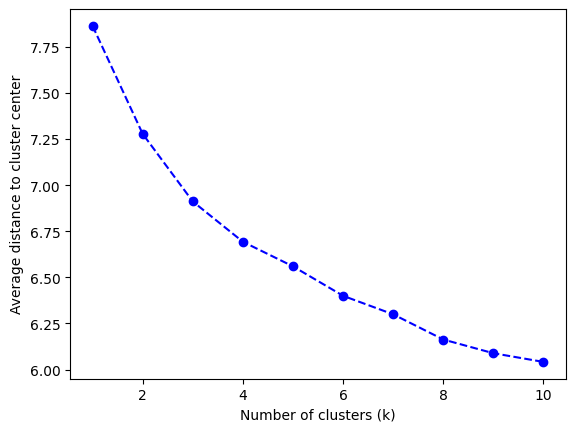

In [ ]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.

plt.plot(clusters, scores, linestyle='--', marker='o', color='b')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average distance to cluster center')

In [ ]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.

selected_kmeans = KMeans(9, random_state=42)

# Fit the model
model = selected_kmeans.fit(X_pca)

# Make cluster predicitons
preds = model.predict(X_pca)

### Discussion 3.1: Apply Clustering to General Population
I have created a function to run KMeans over a number of different cluster counts (From 1-10) This clusters points together that are as similar as posisble.

I chose the number of clusters using the elbow method by running KMeans for a range of K values (1-10) and then plotting them.

I chose 9 clusters for the data because any more than that would offer very little gain and may cause overfitting.


### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [ ]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep=';')

In [ ]:
customers.head(2)

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,KK_KUNDENTYP,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_BAUMAX,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2,4,1,5.0,5,1,5,1,2,2,2,0,4.0,1,1,20.0,5.0,2.0,2.0,10.0,5.0,1,4,5.0,6,5,2,6,6,7,3,4,1,3,1,1,2,1,3,0.0,0.0,1,3,10.0,2.0,0.0,1.0,NaN,6.0,9.0,1.0,0.0,1.0,5.0,1992.0,W,7.0,1,1A,13,2.0,2.0,0.0,0.0,0.0,4.0,3.0,2.0,4.0,4.0,1.0,4.0,3.0,1.0,1201.0,3.0,3.0,1.0,0.0,1.0,5.0,5.0,1.0,2.0,1.0
1,-1,4,1,NaN,5,1,5,1,3,2,2,0,NaN,0,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,3,6,2,6,7,5,3,4,1,3,3,2,4,1,3,0.0,0.0,1,3,11.0,3.0,0.0,NaN,NaN,0.0,9.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
customers.shape

(191652, 85)

In [ ]:
customers['Missing_data_in_rows'] = customers.isna().sum(axis=1)

In [ ]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.

# Clean customer data
customers_cleaned = clean_data(customers)

Read in dataset
Convert missing or unknown values
Remove selected rows and columns
Seperate multi-level/binary variables into two seperate lists
Rencoded binary categorical variables
Change multi-level list to only the ones being kept
Rencoded multi-level categorical variables
Create variable for Decade
Create variable for Movement
Added both engineered variables to data frame and deleted the original feature
Create variable for Wealth Status
Created variable for Life Stage
Added both engineered variables to data frame and deleted the original feature
Removed mixed type features
Number of features (191652, 107)


In [ ]:
# Impute and Standardization

customer_imputer = imputer.transform(customers_cleaned)
customer_scaled = scaler.transform(customer_imputer)

In [ ]:
# Apply PCA to the customer data

X_pca_customer = pca.transform(customer_scaled)

In [ ]:
# Apply clustering to the customer data

customer_preds = model.predict(X_pca_customer)

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

In [ ]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.

# Number of clusters
n_clusters = model.n_clusters

# Counts for general population
gen_pop_count = pd.Series(preds).value_counts().sort_index()

# Counts for customers
customer_count = pd.Series(customer_preds).value_counts().sort_index()

# Proportion of data points in each cluster for general population data
gen_pop_prop = gen_pop_count / gen_pop_count.sum()

# Proportions of data points in each cluster for customers data
customer_prop = customer_count / customer_count.sum()

# Combine into a dataframe to plot easily
cluster_proportions = pd.DataFrame ({
    'cluster': range(n_clusters),
    'General Population': gen_pop_prop.values,
    'Customers': customer_prop.values
})

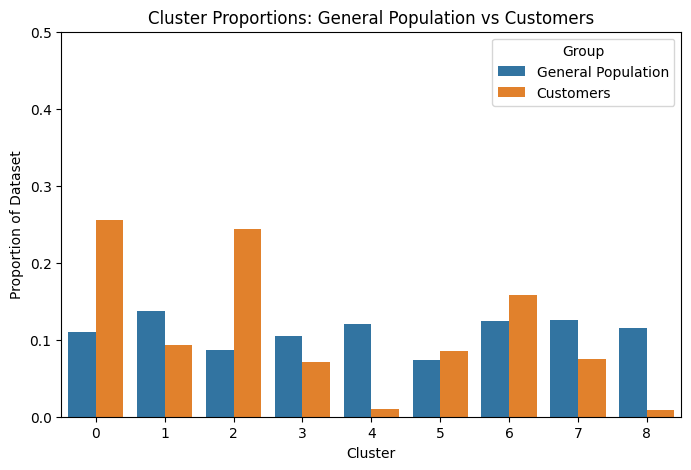

In [ ]:
# Reshape to long format

cluster_proportions_melt = cluster_proportions.melt(id_vars='cluster',
                                                    value_vars=['General Population', 'Customers'],
                                                    var_name='Group',
                                                    value_name='Proportions')

# Visuialize the proportions
plt.figure(figsize=(8, 5))
sns.barplot(data=cluster_proportions_melt, x='cluster', y='Proportions', hue='Group')
plt.title('Cluster Proportions: General Population vs Customers')
plt.ylabel('Proportion of Dataset')
plt.xlabel('Cluster')
plt.ylim(0, 0.5)
plt.legend(title='Group')
plt.show()



> There are some under-represented clusters in the customer data; such as clusters 1, 3, 4, 7, and 8.

> There are some over-represented clusters in the customer data; such as clusters 0, 2, 5, and 6.

In [ ]:
# Inverse PCA
inverse_pca = pca.inverse_transform(model.cluster_centers_)

# Inverse Scaler
inverse_scaler = scaler.inverse_transform(inverse_pca)

# Convert to dataframe
cluster_centers = pd.DataFrame(inverse_scaler, columns=general_pop.columns)

In [ ]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?

# Looking at overrepresented cluster from customers: Cluster 0
cluster_centers.loc[0].sort_values().head()

,0
FINANZTYP_5,-0.037856
ANZ_TITEL,0.003122
CJT_GESAMTTYP_2.0,0.005361
SOHO_KZ,0.007630
LP_STATUS_FEIN_7.0,0.007775


In [ ]:
# Looking at overrepresented cluster from customers: Cluster 2
cluster_centers.loc[2].sort_values().head()

,2
LP_STATUS_FEIN_2.0,-0.052513
FINANZTYP_1,-0.013675
LP_FAMILIE_FEIN_3.0,-0.003775
LP_FAMILIE_FEIN_4.0,-0.002121
LP_STATUS_FEIN_4.0,-0.001581


In [ ]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?

# Looking at underrepresented cluster from customers: Cluster 3
cluster_centers.loc[3].sort_values().head()

,3
ANZ_TITEL,0.000882
NATIONALITAET_KZ_2.0,0.001122
LP_FAMILIE_FEIN_3.0,0.005103
LP_STATUS_FEIN_7.0,0.005245
LP_STATUS_FEIN_5.0,0.005305


In [ ]:
# Looking at underrepresented cluster from customers: Cluster 8
cluster_centers.loc[8].sort_values().head()

,8
FINANZTYP_2,-0.035168
CJT_GESAMTTYP_2.0,-0.017200
ANZ_TITEL,0.000737
LP_STATUS_FEIN_7.0,0.004356
SOHO_KZ,0.007595


### Discussion 3.3: Compare Customer Data to Demographics Data

> By looking at the proportions in each cluster for the general population and the customers data side by side, we can see that there are some clusters where the customers data is overrepresented (Meaning the target audience / Relatively popular) and some clusters where the customers data is underrepresented (Not the target audience / Relatively unpopular)

This means that the customer base is not universal since there is a mismatch in the proportions.

However; looking at the type of people apart of the clusters, you cannot describe groups of the population that are popular/not popular with the mail-order company because there are relatively the same for the underrepresented clusters (NON targets) and overrepresented clusters (Targets)

For example, for the overrepresented clusters, the type of people are described using the following features:
* FINANZTYP (1,5) - Financial types of having low financial intrest or being an investor
* ANZ_HH_TITEL - Having professional academic titles
* SOHO_KZ - Having/Not having a small/home office
* LP_STATUS_FEIN (2,7, 4) - Social statuses being orientation-seeking low-income earners, villagers, and title holders
* LP_FAMILIE_FEIN (3,4) - Family type being a young single parent / single parent with teenager
* CJT_GESAMTTYP (2) -  Preferred buying channel of advertising and consumption traditionalist

For the underrepresented clusters, the type of people are described using the following features:
* FINANZTYP (2) - Financial types of a money-saver
* ANZ_TITEL - Having professional academic titles
* SOHO_KZ - Having/Not having a small/home office
* LP_STATUS_FEIN (7,5) - Social statuses being title holders and minimalistic high-income earners
* LP_FAMILIE_FEIN (3) - Family type being a young single parent
* CJT_GESAMTTYP (2) -  Preferred buying channel of advertising and consumption traditionalist
* NATIONALITAET_KZ (2) - Nationality of foreign-sounding based on name analysis


> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.